Here we explore descriptive statistics for cell area of embryonic stem cells.

In [68]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_excel("cellarea.xlsx", header=None, index_col=None)
data.head()

,0
0,48000
1,42000
2,11000
3,26000
4,15000


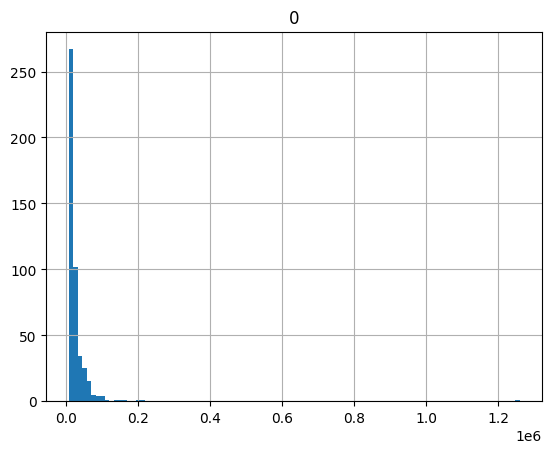

In [69]:
hist = data.hist(bins=100)

We can see an outliers at the very right end of the graph.

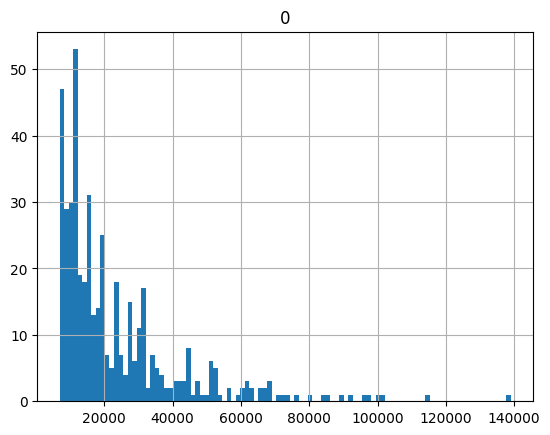

In [70]:
# Remove the outlier using 99% percentile
q = data.quantile(0.99)
car = data[data < q]
hist2 = car.hist(bins=100)

In [71]:
# Rescale the data to moderate values so that the area is expressed in thousands of 
# micro m^2
car_scaled = car / 1000.0

# Compute the locations of the car
print("Median: " + str(car_scaled.median()))
print("Mode: " + str(car_scaled.mode()))

# Compute variability
print("Var: " + str(car_scaled.var()))
print("Std: " + str(car_scaled.std()))


Median: 0    17.0
dtype: float64
Mode:       0
0  10.0
Var: 0    360.630484
dtype: float64
Std: 0    18.990273
dtype: float64


<Axes: >

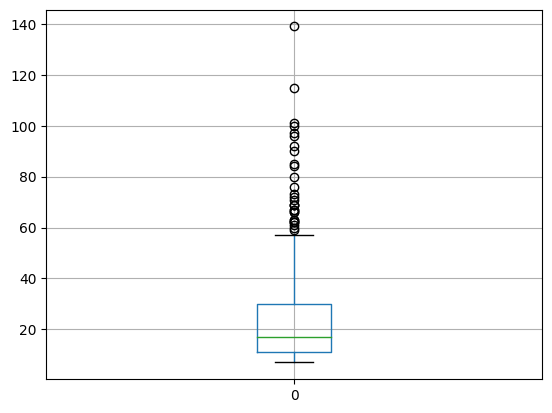

In [72]:
# Box-and-Whiskers Plot
# The top and bottom of the "box" are the 25th and 75th percentile of the data, 
# respectively, with the distances between the representing the IQR. The green line inside the box 
# is the median. Since the median is not centered in the box, the sample is skewed. Whiskers 
# extend from the lower and upper sides of the box to the data's most extreme values
# within 1.5 times the IQR. Potential outliers are displayed with black "o" beyond
# the endpoints of the wiskers.
car_scaled.boxplot()

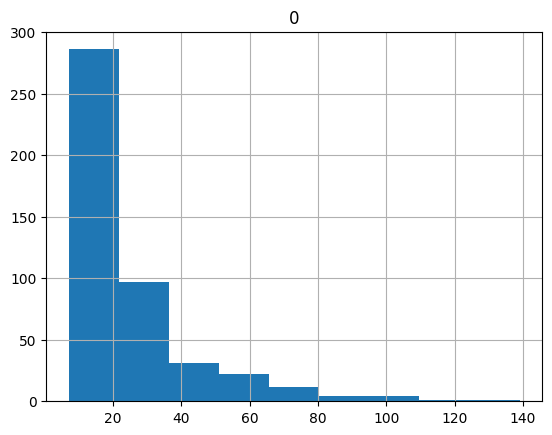

In [77]:
# Histogram
# Histogram is a rough approximation of the population distribution based on a sample. 
# Plotted in histogram are frequencies for interval-grouped data. Common way to determine the bin size
# is to use Sturges'r rule:
# k = 1 + log2n, where n is the size of the sample
k = 1 + np.log2(car_scaled.size)
hist3 = car_scaled.hist(bins=int(k))

In [78]:
# Empirical Cumulative Distribution Function
# The empirical cumulative distribution function (ECDF) F_n(x) for sample, X_1, ..., X_n
# is defined as:
# F_n(x) = (1 / n) \sum^n_{i = 1} \mathbf{1} (X_i \leq x)
# and represents the proportion of sample values smaller than x. 